In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data=pd.read_csv("Mall_Customers.csv")

In [113]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [114]:
data.rename(columns={"Spending Score (1-100)":"spending_scores","Annual Income (k$)":"AnnualIncome"},inplace=True)

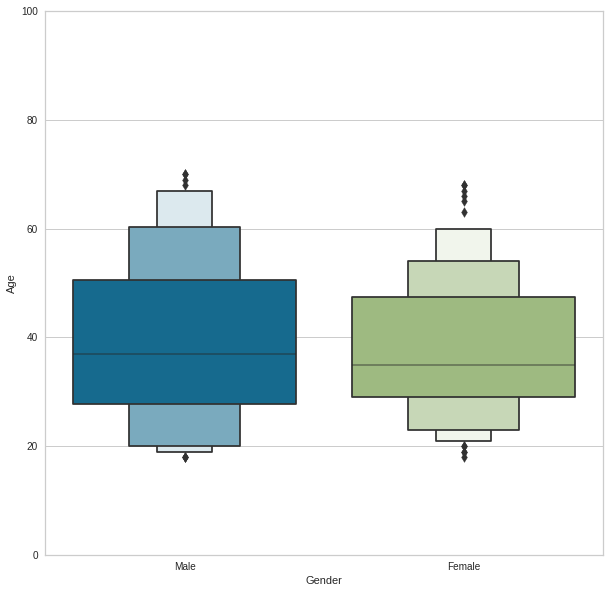

In [115]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

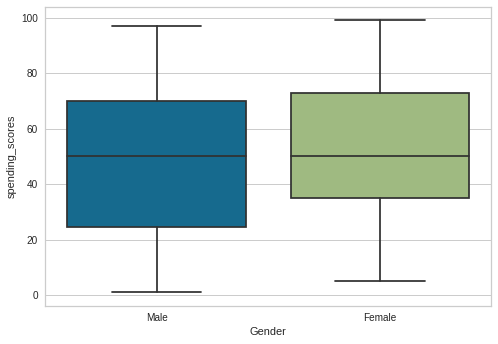

In [116]:
# Count Plot
sns.boxplot(x=data['Gender'],y=data['spending_scores'])

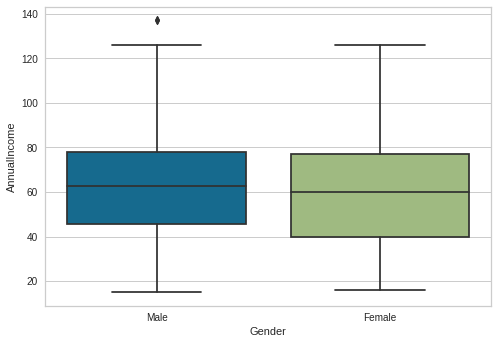

In [117]:
sns.boxplot(x=data['Gender'],y=data['AnnualIncome'])

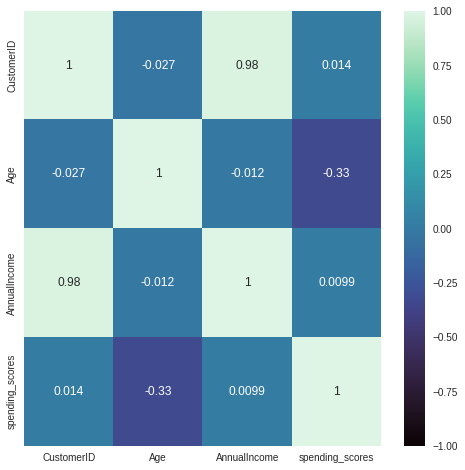

In [118]:
# Correlation Plot
corr=data.corr()
plt.figure(figsize=(8,8))
sn=sns.heatmap(corr,vmin=-1,center=0, annot = True, cmap = 'mako')

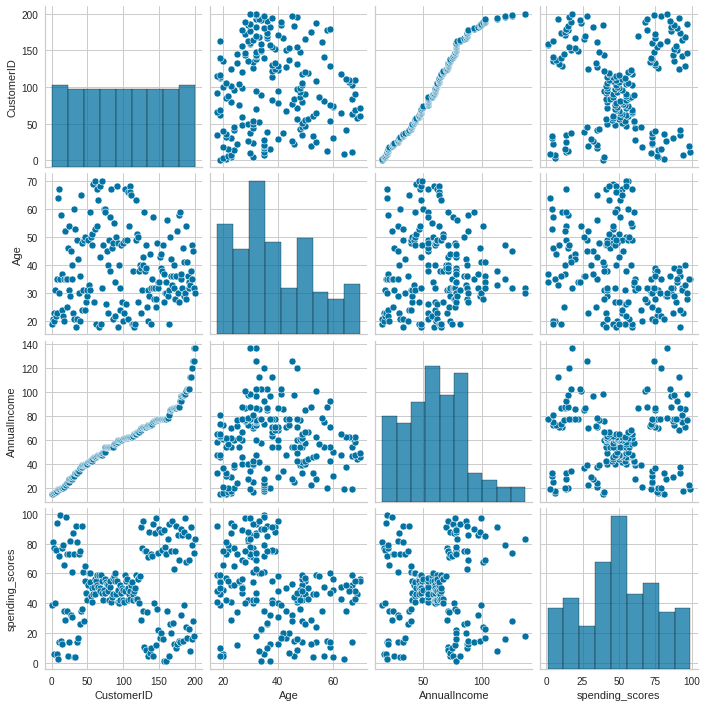

In [119]:
sns.pairplot(data)

In [120]:
data.describe()

,CustomerID,Age,AnnualIncome,spending_scores
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Dealing with Missing values


In [121]:
data[data.duplicated()]

,CustomerID,Gender,Age,AnnualIncome,spending_scores


In [122]:
data.isna().sum()

CustomerID         0
Gender             0
Age                0
AnnualIncome       0
spending_scores    0
dtype: int64

In [123]:
#Outliers
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fed11594690>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed116f4650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed116095d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed116f4250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed116ed390>],
 'means': []}

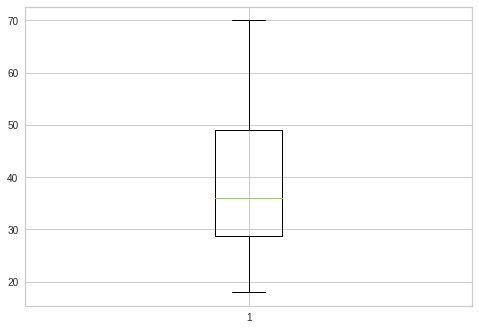

In [124]:
#after removing the outliers
plt.boxplot(data['Age'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fed115a4f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed115c8a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed115a4a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed1159c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed1159ca90>],
 'means': []}

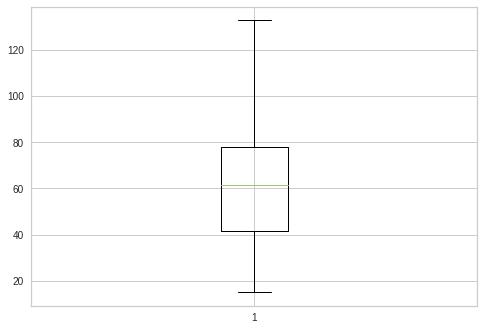

In [125]:
plt.boxplot(data['AnnualIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fed106b6bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed106be690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed106b6690>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed106c5190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed106c56d0>],
 'means': []}

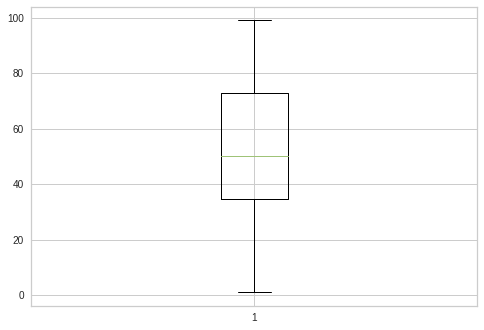

In [126]:
plt.boxplot(data['spending_scores'])

In [127]:
#categorical columnscheck and encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [128]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,spending_scores
0,1.0,1,19.0,15.0,39.0
1,2.0,1,21.0,15.0,81.0
2,3.0,0,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,0,31.0,17.0,40.0


In [129]:
# for scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data1=sc.fit_transform(data.iloc[:,1:])

In [130]:
from sklearn.cluster import KMeans
data.drop('CustomerID',axis=1,inplace=True)
km = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = km.fit_predict(data)
data.head()

,Gender,Age,AnnualIncome,spending_scores,Cluster
0,1,19.0,15.0,39.0,2
1,1,21.0,15.0,81.0,2
2,0,20.0,16.0,6.0,2
3,0,23.0,16.0,77.0,2
4,0,31.0,17.0,40.0,2


In [131]:
data['Cluster'].value_counts()

2    123
1     39
0     38
Name: Cluster, dtype: int64

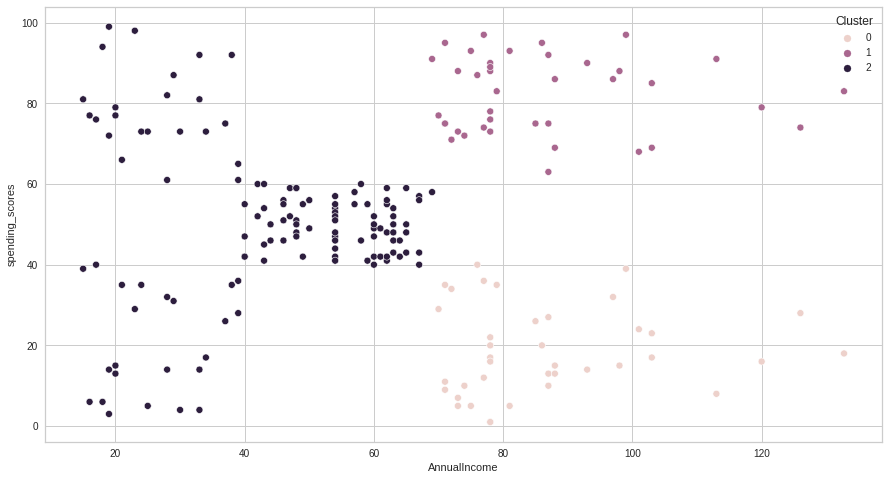

In [132]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data['AnnualIncome'],
                y=data['spending_scores'],
                hue=data['Cluster']
                )
plt.show()

In [133]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(data, 
                         km.labels_, 
                         metric='euclidean')
score

0.3842057644019546

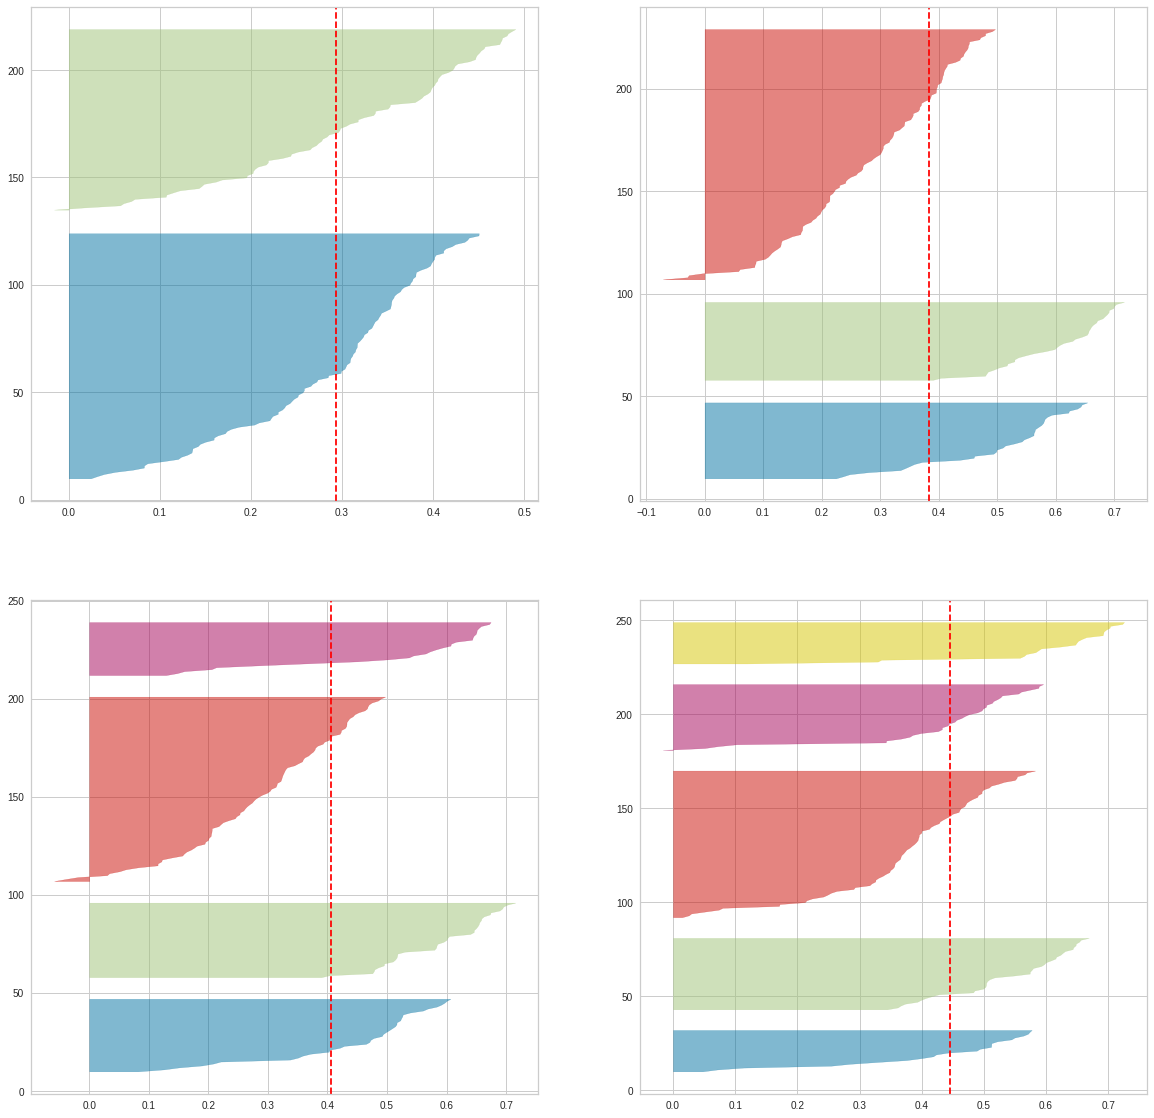

In [134]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(20,20))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)